## Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid Search with Cross-Validation (GridSearchCV) is a technique used in machine learning to systematically search for the best combination of hyperparameters for a given model. The primary purpose of GridSearchCV is to automate the process of hyperparameter tuning, helping you find the hyperparameter values that result in the best model performance on a validation dataset while avoiding manual trial-and-error.

Here's how GridSearchCV works:

1. **Define Hyperparameter Grid:**
   - First, you define a grid of hyperparameter values that you want to search over. These values represent different settings for hyperparameters that can significantly impact the model's performance. For example, in a support vector machine (SVM) model, you might want to search for the best combination of the kernel type (linear, polynomial, radial basis function, etc.) and the regularization parameter (C).

2. **Cross-Validation:**
   - GridSearchCV uses a cross-validation technique, typically k-fold cross-validation, to evaluate each combination of hyperparameters. In k-fold cross-validation, the dataset is divided into k subsets (or folds), and the model is trained and evaluated k times, with each fold serving as the validation set once and the remaining folds as the training set. This helps ensure robust performance evaluation.

3. **Hyperparameter Combinations:**
   - GridSearchCV exhaustively explores all possible combinations of hyperparameter values specified in the grid. For each combination, it trains the model on the training portion of the data and evaluates its performance on the validation portion.

4. **Performance Metric:**
   - You also specify a performance metric (e.g., accuracy, F1-score, or mean squared error) that GridSearchCV uses to assess the model's performance during cross-validation. The goal is to find the hyperparameters that optimize this metric.

5. **Selecting the Best Model:**
   - After evaluating all combinations, GridSearchCV selects the combination of hyperparameters that results in the best performance according to the specified metric.

6. **Final Model Training:**
   - With the best hyperparameters identified, GridSearchCV retrains the model using these optimal hyperparameters on the entire training dataset. This produces the final model that you can use for making predictions on new, unseen data.

GridSearchCV is a powerful tool for hyperparameter tuning because it systematically explores the hyperparameter space, ensuring that you find the best hyperparameters for your model while avoiding overfitting to the validation set. However, it can be computationally expensive, especially when the hyperparameter space is large or when the dataset is substantial. In such cases, alternatives like RandomizedSearchCV, which randomly samples from the hyperparameter space, can be used to reduce computational costs while still searching for good hyperparameters.

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

X,y = make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=2,random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

from sklearn.model_selection import GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")

parameters = {'penalty': ('l1', 'l2', 'elasticnet'),'C':[1,10,20,30]}

classifier = LogisticRegression()

clf = GridSearchCV(classifier,param_grid=parameters,cv=5)

clf.fit(X_train,y_train)

print(clf.best_params_)
print(clf.best_score_)

classifier=LogisticRegression(C=1,penalty='l2')
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
print("--------------------------------")
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

{'C': 1, 'penalty': 'l2'}
0.8087500000000001
--------------------------------
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



## Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Grid Search CV and Randomized Search CV are both techniques for hyperparameter tuning in machine learning, but they differ in their approach to exploring the hyperparameter space.

| Aspect                            | Grid Search CV                                              | Randomized Search CV                                      |
|-----------------------------------|-------------------------------------------------------------|-----------------------------------------------------------|
| Search Strategy                   | Exhaustively searches all specified hyperparameter values. | Randomly samples hyperparameter values from specified distributions. |
| Flexibility                       | Limited to a predefined grid of hyperparameter combinations. | More flexible as it allows for a broader and continuous range of hyperparameters. |
| Hyperparameter Space Exploration  | Suitable when you have a small number of hyperparameters and a relatively small grid to search. | Suitable when the hyperparameter space is large or continuous, making an exhaustive search impractical. |
| Computational Efficiency          | Can be computationally expensive, especially with large grids and many hyperparameters. | Generally more computationally efficient since it doesn't explore all combinations, making it faster for large spaces. |
| Likelihood of Finding Optimum     | Guarantees that the best combination within the grid is found, but may miss better hyperparameters outside the grid. | Less likely to find the absolute best combination but may discover good combinations faster due to random sampling. |
| Overfitting Risk                  | Lower risk of overfitting to the validation set because it uses cross-validation. | Similar to Grid Search CV, there is a risk of overfitting to the validation set if not properly controlled. |
| Customization                     | May require additional iterations if the initial grid does not yield satisfactory results. | Provides more flexibility to fine-tune hyperparameters in response to initial results without increasing the search space significantly. |
| Practical Use Cases               | Well-suited for scenarios with a limited hyperparameter space and when you want to ensure you've explored all possibilities. | Useful when the hyperparameter space is vast, and you have computational constraints or need to quickly identify good hyperparameter combinations. |

The choice between Grid Search CV and Randomized Search CV depends on the nature of your hyperparameter tuning problem. Grid Search CV is suitable when you have a small and well-defined hyperparameter space, and you want to ensure you've explored all combinations. On the other hand, Randomized Search CV is more practical when dealing with a large or continuous hyperparameter space, as it can efficiently discover good hyperparameter combinations without an exhaustive search. It also provides flexibility for fine-tuning as you progress through iterations.

## Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage, also known as information leakage or data snooping, is a critical issue in machine learning. It occurs when information from outside the training dataset is improperly used to create or evaluate a machine learning model. Data leakage can lead to artificially high model performance during training and validation but result in poor generalization to new, unseen data. It is a problem because it can mislead model development and undermine the model's ability to make accurate predictions on real-world data.

Here's an example to illustrate data leakage:

**Example: Predicting Loan Default**

Suppose you are building a machine learning model to predict whether an individual will default on a loan based on their credit history. You have a dataset with features such as credit score, income, employment status, and previous loan history, as well as the target variable indicating whether the individual defaulted on their loan (1 for default, 0 for non-default).

**Data Leakage Scenario:**
1. You notice that the dataset includes a feature called "Months Since Last Default," which indicates how many months have passed since the individual's last loan default (if any).
2. You decide to use this feature in your model because you believe it could be a strong predictor of loan default.

**Problem:** In this scenario, using the "Months Since Last Default" feature introduces data leakage. Here's why:

- During model development, the feature "Months Since Last Default" may contain information about loan defaults that occurred after the loan approval decision. For example, if someone defaulted on a loan after 12 months, the feature value for that individual would be 12. However, at the time of making a loan approval decision, this information would not have been available.
- By using this feature, your model effectively "looks into the future" to make predictions. It learns to use information that would not be available at the time when the model is deployed for making loan approval decisions.

**Consequences:**
- The model may appear to perform exceptionally well during training and cross-validation because it has access to information that it shouldn't.
- When you deploy the model to make real loan approval decisions, it is likely to perform poorly because it cannot access future information. It may make inaccurate predictions, leading to increased financial risks for the lender.

To prevent data leakage in this scenario, you should carefully review your features to ensure they do not contain information that would not be available at the time when predictions are made. In the case of "Months Since Last Default," you should exclude this feature from your model and use only information that would be known at the time of making loan approval decisions, such as credit score, income, and employment status. This ensures that your model is built on relevant and valid information and avoids the problem of data leakage.

Types of data leakage : https://www.kaggle.com/code/alexisbcook/data-leakage

## Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is essential when building a machine learning model to ensure that your model generalizes well to new, unseen data. Here are some strategies to prevent data leakage:

1. **Understand Your Data and Domain:**
   - Gain a deep understanding of your dataset and the problem domain. This includes knowing the context, how the data was collected, and the meaning of each feature. Understanding the domain helps you identify potential sources of data leakage.

2. **Separate Data Sources:**
   - Ensure that you keep distinct datasets separate throughout the modeling process. The primary datasets are typically training, validation, and test datasets. Never use information from validation or test datasets during model training.

3. **Feature Engineering:**
   - Be cautious when creating new features or transforming existing ones. Ensure that any feature engineering is based on information that would be available at the time of making predictions on unseen data. If a feature incorporates future information, it can lead to data leakage.

4. **Use Proper Cross-Validation:**
   - When performing cross-validation, ensure that each fold respects the temporal or causal order of the data, especially in time-series or sequential data problems. This helps prevent data leakage related to time-based information.

5. **Avoid Target Leakage:**
   - Ensure that no features derived from the target variable (the variable you're trying to predict) are included in the model. Using such features can lead to significant data leakage and artificially inflate model performance.

6. **Randomness and Seeds:**
   - If randomness is involved in your data preprocessing or model training (e.g., random splits, data shuffling, random initialization of parameters), set a random seed to ensure reproducibility. This prevents changes in results due to random fluctuations.

7. **Feature Selection:**
   - Perform feature selection before model training to ensure that only relevant and non-leaky features are included in the model. Techniques like recursive feature elimination and feature importance analysis can help identify the most important features.

8. **Review External Data Sources:**
   - If you incorporate external data sources into your model, carefully assess their relevance and potential for data leakage. Ensure that the external data is consistent with the information that would be available at prediction time.

9. **Data Validation:**
   - Regularly validate your data preprocessing and feature engineering pipelines to ensure that they do not introduce data leakage inadvertently. Check intermediate results to confirm that they align with expectations.

10. **Documentation and Communication:**
    - Document your data preprocessing and feature engineering steps thoroughly. Clearly communicate with team members or stakeholders to ensure everyone understands the potential sources of data leakage and how they are mitigated.

11. **Regularly Monitor and Audit Models:**
    - After deployment, continuously monitor your machine learning model's performance to detect any unexpected behavior or data leakage. Regular model audits and performance assessments can help maintain model integrity.

By following these strategies and maintaining a vigilant approach to data handling and preprocessing, you can significantly reduce the risk of data leakage and build machine learning models that are more robust and reliable in making predictions on real-world data.

Steps to fix the problem of Data Leakage :


**Idea-1 (Extracting the appropriate set of Features)**: To fix the problem of data leakage, the first method we can try is to extract the appropriate set of features for a machine learning model. While choosing features, we should make sure that the given features are not correlated with the given target variable, as well as that they do not contain information about the target variable, which is not naturally available at the time of prediction.

**Idea-2 (Create a Separate Validation Set)** :To minimize or avoid the problem of data leakage, we should try to set aside a validation set in addition to training and test sets if possible. The purpose of the validation set is to mimic the real-life scenario and can be used as a final step. By doing this type of activity, we will identify if there is any possible case of overfitting which in turn can act as a caution warning against deploying models that are expected to underperform in the production environment.

**Idea-3 (Apply Data preprocessing Separately to both Train and Test subsets)** : While dealing with neural networks, it is a common practice that we normalize our input data firstly before feeding it into the model. Generally, data normalization is done by dividing the data by its mean value. More often than not, this normalization is applied to the overall data set, which influences the training set from the information of the test set and eventually it results in data leakage. Hence, to avoid data leakage, we have to apply any normalization technique separately to both training and test subsets.

**Idea-4 (Time-Series Data)** : When dealing with time-series data, we should pay more attention to data leakage. For example, if we somehow use data from the future when doing computations for current features or predictions, it is highly likely to end up with a leaked model. It generally happens when the data is randomly split into train and test subsets. So, when working with time-series data, we put a cutoff value on time which might be very useful, as it prevents us from getting any information after the time of prediction.

**Idea-5 (Cross-Validation)** : When we have a limited amount of data to train our Machine learning algorithm, then it is a good practice to use cross-validation in the training process. What Cross-validation is doing is that it splits our complete data into k folds and iterates over the entire dataset in k number of times and each time we are using k-1 fold for training and 1 fold for testing our model.
The advantage of this approach is that we used the entire dataset for both training and testing purposes. However, if you get suspicious about data leakage, then it is better to scale or normalize the data and compute the parameters on each fold of cross-validation separately.


## Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying mis-classifications, and improving predictive accuracy.

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the total number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix, as shown below, with 4 values:

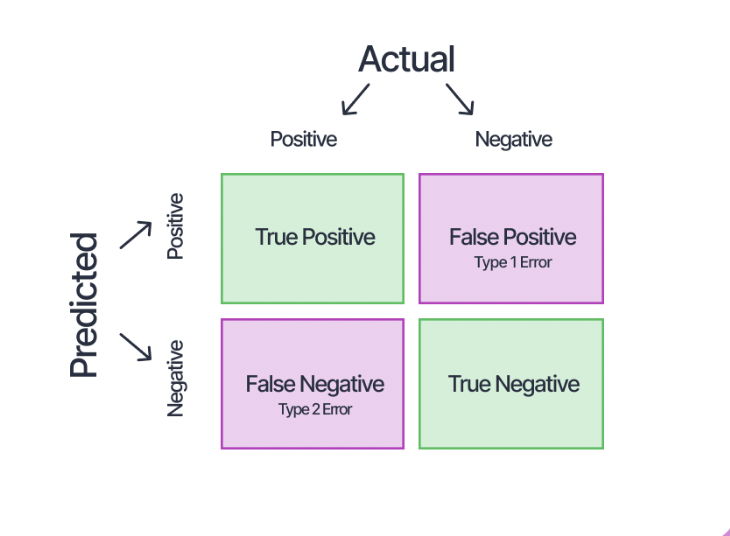

- The target variable has two values: Positive or Negative
- The columns represent the actual values of the target variable
- The rows represent the predicted values of the target variable

Important Terms in a Confusion Matrix

1. True Positives (TP): The number of instances correctly predicted as the positive class (e.g., correctly identified as "Yes" or "Class 1" if it's a binary classification problem).

2. True Negatives (TN): The number of instances correctly predicted as the negative class (e.g., correctly identified as "No" or "Class 0" if it's a binary classification problem).

3. False Positives (FP): The number of instances incorrectly predicted as the positive class when they actually belong to the negative class (also known as Type I error or false alarms).

4. False Negatives (FN): The number of instances incorrectly predicted as the negative class when they actually belong to the positive class (also known as Type II error or misses).

With the help of Confusion Matrix we can calculate the following metrics:

1. **Accuracy**: 
   - It measures the overall correctness of predictions and is calculated as <br>**(TP+TN)/(TP+TN+FP+FN)**.
   - However, accuracy may not be suitable for imbalanced datasets.

2. **Precision (Positive Predictive Value)**: 
    - It measures the accuracy of positive predictions and is calculated as <br>**TP/(TP+FP)**.
    - It answers the question: "Of all the instances predicted as positive, how many were correctly classified?"

3. **Recall (Sensitivity, True Positive Rate)**: 
    - It measures the model's ability to identify all relevant instances of the positive class and is calculated as <br> **TP/(TP+FN)**.
    - It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

4. **Specificity (True Negative Rate)**: 
     - It measures the model's ability to identify all relevant instances of the negative class and is calculated as <br>**TN/(TN+FP)**.
     - It answers the question: "Of all the actual negative instances, how many did the model correctly classify?"
     
5. **F1-Score:** 
     - The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. It is calculated as <br> **2(Precision*Recall) / (Precision+Recall)**.
     
6. **Receiver Operating Characteristic (ROC) Curve and Area Under the ROC Curve (AUC-ROC)**: 
    - These metrics evaluate a model's performance across various classification thresholds and are especially useful when you need to balance precision and recall. The ROC curve shows the trade-off between true positive rate and false positive rate, while AUC-ROC summarizes this trade-off into a single value.

## Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are two important performance metrics used to evaluate the quality of a classification model, particularly in the context of a confusion matrix. They provide insights into the model's ability to make accurate positive predictions and to capture all relevant positive instances, respectively. Here's an explanation of the difference between precision and recall:

**Precision (Positive Predictive Value):**

- **Definition:** Precision measures the accuracy of positive predictions made by the model. It quantifies the proportion of instances predicted as positive that are actually true positives. Precision is calculated as ***TP/(TP+FP)***

- **Interpretation:** Precision answers the question: "Of all the instances that the model predicted as positive, how many were correctly classified?" It focuses on the correctness of positive predictions and is particularly relevant when the cost of false positives is high. A high precision indicates that the model is cautious about making positive predictions and tends to be accurate when it does make them.

**Recall (Sensitivity, True Positive Rate):**

- **Definition:** Recall measures the model's ability to identify all relevant positive instances from the total number of actual positive instances. It quantifies the proportion of true positives that were correctly classified by the model. Recall is calculated as ***TP/(TP+FN)***

- **Interpretation:** Recall answers the question: "Of all the actual positive instances, how many did the model correctly classify?" It focuses on the model's ability to capture all positive cases and is particularly relevant when it's crucial not to miss any positive instances. A high recall indicates that the model is sensitive to identifying positive cases, even if it means it may produce more false positives in the process.

In summary:

- **Precision** tells you how accurate your positive predictions are. It is concerned with minimizing false positives, which is beneficial when false positives are costly or undesirable.

- **Recall** tells you how effectively your model captures all positive instances. It is concerned with minimizing false negatives, which is crucial when missing positive cases can have significant consequences.

## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix is crucial for understanding the types of errors your classification model is making. A confusion matrix provides a breakdown of the model's predictions, categorizing them into four key components: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). By analyzing these components, you can gain valuable insights into your model's performance and the types of errors it is committing. Here's how you can interpret a confusion matrix to determine the types of errors your model is making:

1. **True Positives (TP):**
   - **Definition:** TP represents instances that the model correctly predicted as positive. These are cases where the model accurately identified the positive class.
   - **Interpretation:** TP indicates the number of successful positive predictions made by the model. It represents instances where the model correctly recognized the presence of the target condition or class.

2. **True Negatives (TN):**
   - **Definition:** TN represents instances that the model correctly predicted as negative. These are cases where the model accurately identified the absence of the positive class.
   - **Interpretation:** TN indicates the number of successful negative predictions made by the model. It represents instances where the model correctly recognized the absence of the target condition or class.

3. **False Positives (FP):**
   - **Definition:** FP represents instances that the model incorrectly predicted as positive when they were actually negative. These are instances where the model made a false alarm or Type I error.
   - **Interpretation:** FP indicates the number of instances where the model wrongly classified something as positive when it was not. It represents situations where the model has a tendency to overpredict the positive class.

4. **False Negatives (FN):**
   - **Definition:** FN represents instances that the model incorrectly predicted as negative when they were actually positive. These are instances where the model missed the positive class or made a Type II error.
   - **Interpretation:** FN indicates the number of instances where the model failed to classify something as positive when it was. It represents situations where the model has a tendency to underpredict the positive class.

By examining the values in each quadrant of the confusion matrix, you can assess your model's strengths and weaknesses.

- **High TP and TN:** A model with a high number of TP and TN indicates strong predictive accuracy and is effective at both recognizing positive cases and correctly identifying negative cases.

- **High FP:** A model with a high number of FP suggests that it tends to make false positive errors, indicating a propensity to overpredict the positive class. This may be useful in situations where being cautious and flagging potential positives is more critical than avoiding false alarms.

- **High FN:** A model with a high number of FN suggests that it tends to miss positive cases, indicating a propensity to underpredict the positive class. This may be problematic in scenarios where missing positive instances has significant consequences.

Understanding the types of errors your model is making can guide further model improvements, threshold adjustments, or changes to your classification strategy. Additionally, it can help you calculate various performance metrics, such as accuracy, precision, recall, F1-score, and specificity, to gain a more quantitative assessment of your model's performance and the trade-offs between different types of errors.

## Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

With the help of Confusion Matrix we can calculate the following metrics:

1. **Accuracy**: 
   - It measures the overall correctness of predictions and is calculated as <br>**(TP+TN)/(TP+TN+FP+FN)**.
   - However, accuracy may not be suitable for imbalanced datasets.

2. **Precision (Positive Predictive Value)**: 
    - It measures the accuracy of positive predictions and is calculated as <br>**TP/(TP+FP)**.
    - It answers the question: "Of all the instances predicted as positive, how many were correctly classified?"

3. **Recall (Sensitivity, True Positive Rate)**: 
    - It measures the model's ability to identify all relevant instances of the positive class and is calculated as <br> **TP/(TP+FN)**.
    - It answers the question: "Of all the actual positive instances, how many did the model correctly classify?"

4. **Specificity (True Negative Rate)**: 
     - It measures the model's ability to identify all relevant instances of the negative class and is calculated as <br>**TN/(TN+FP)**.
     - It answers the question: "Of all the actual negative instances, how many did the model correctly classify?"
     
5. **F1-Score:** 
     - The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. It is calculated as <br> **2(Precision*Recall) / (Precision+Recall)**.
     
6. **Receiver Operating Characteristic (ROC) Curve and Area Under the ROC Curve (AUC-ROC)**: 
    - These metrics evaluate a model's performance across various classification thresholds and are especially useful when you need to balance precision and recall. The ROC curve shows the trade-off between true positive rate and false positive rate, while AUC-ROC summarizes this trade-off into a single value.

## Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a model is closely related to the values in its confusion matrix, as the confusion matrix provides a detailed breakdown of the model's predictions, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These values are used to calculate accuracy and other performance metrics.

**Accuracy:**
- Accuracy is a metric that measures the overall correctness of a classification model's predictions.
- It is calculated as (TP+TN)/(TP+TN+FP+FN) , which is the ratio of correct predictions (TP and TN) to the total number of instances.


**Relationship:**
- Accuracy depends on the sum of TP and TN in the confusion matrix because these are the correct predictions. Therefore, the more TP and TN a model has, the higher its accuracy.
- Conversely, accuracy is negatively affected by the sum of FP and FN because these are the incorrect predictions. As FP and FN increase, accuracy decreases.

Accuracy provides an overall measure of a model's performance by considering both correct and incorrect predictions. It is directly related to the values in the confusion matrix, with TP and TN contributing positively to accuracy and FP and FN contributing negatively. While accuracy is a useful metric, it may not provide a complete picture of model performance, especially in situations with class imbalance, where other metrics like precision, recall, and F1-score may offer a more informative assessment of the model's effectiveness.

## Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can be a valuable tool for identifying potential biases or limitations in your machine learning model, particularly when you are dealing with classification tasks. Here's how you can use a confusion matrix to detect such biases or limitations:

1. **Class Imbalance:**
   - **Issue:** Class imbalance occurs when one class significantly outnumbers the other in the dataset. This can lead to a model that is biased towards the majority class and may perform poorly on the minority class.
   - **Detection:** Look at the distribution of values in the confusion matrix. If one class has a disproportionately higher number of true positives (TP) or true negatives (TN) compared to the other, it may indicate class imbalance.

2. **Bias Towards Negative or Positive Predictions:**
   - **Issue:** A model may have a bias towards predicting one class more frequently than the other, leading to an imbalance in false positives (FP) or false negatives (FN).
   - **Detection:** Compare the number of FP and FN for each class in the confusion matrix. If one class has a substantially higher number of FP or FN, it may indicate a bias towards that class in predictions.

3. **Threshold Sensitivity:**
   - **Issue:** The model's predictions may be sensitive to the classification threshold used to convert predicted probabilities into class labels. A lower threshold may result in more positive predictions, while a higher threshold may lead to more negative predictions.
   - **Detection:** Experiment with different classification thresholds and observe changes in FP and FN rates. A significant shift in predictions with threshold changes can highlight sensitivity issues.

4. **Misclassification Patterns:**
   - **Issue:** Examining specific patterns of misclassification in the confusion matrix can reveal insights into where the model struggles. For example, if the model consistently misclassifies certain subgroups within a class, it may indicate bias or limitations.
   - **Detection:** Analyze FN and FP patterns in the confusion matrix, paying attention to which features or characteristics are associated with misclassified instances.

5. **Performance Disparities:**
   - **Issue:** Different classes within your target variable may exhibit varying degrees of model performance. One class may have a high precision, while another has a high recall or vice versa.
   - **Detection:** Calculate class-specific metrics (precision, recall, F1-score) for each class based on the confusion matrix. Identify classes with significantly different performance characteristics.

6. **External Factors:**
   - **Issue:** External factors, such as data collection bias, may introduce bias or limitations into the model. For example, if your training data is collected in a biased manner, the model may inherit those biases.
   - **Detection:** Examine the sources of your training data and assess whether they may introduce inherent biases. Conduct a bias audit to identify potential sources of bias in data collection.

Using a confusion matrix in conjunction with other metrics like precision, recall, F1-score, and ROC curves can help you uncover potential biases or limitations in your machine learning model. Once identified, you can take corrective measures, such as collecting more balanced data, adjusting classification thresholds, or addressing data collection biases, to mitigate these issues and improve the model's fairness and performance.